<a href="https://colab.research.google.com/github/DT22179/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# Business Problem
## To Explore and analyze the data provided by Orange S.A., to discover key factors responsible for customer churn and suggest ways to ensure customer retention.

## Business Metric - Decrease % of customer churn rate (or increase the % of customer retention).





### Importing Required Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the dataset using pandas

In [3]:
tele_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/EDA/Telecom Churn.csv')

In [4]:
## Let's explore the data
tele_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### So there are 3,333 rows and 20 columns(can say features)

In [5]:
## Let's check column names
tele_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

From the output of **tele_df.columns** we can observe that there are 19 independent feature and one dependent feature(also called target) which is **Churn**. The value of churn can be either **False** or **True** and it is dependent on rest of the features. So we've to examine how to decrease the churn rate of our customer's and increase the retention and for that we will need to explore all the possible relationship between features itself and also between features and target variable to get the solid insights about the data and business problem.

# Different Types Of Categories For Our Features
### Target Feature
* Churn (Bool type) Further we can convert it to int type with value 0 and 1 for False and True respectively. 
Note: Churn is a type of Categorical feature

### Numerical Feature

1. Account Length
2. Number Vmail Messages
3. Total Day Minutes
4. Total Day Calls
5. Total Day Charge
6. Total Eve Minutes
7. Total Eve Calls
8. Total Eve Charge
9. Total Night Minutes
10. Total Night Calls
11. Total Night Charge
12. Total Intl Minutes
12. Total Intl Calls
13. Total Intl Charge
14. Customer Services Call

### Categorical Feature

1. State
2. Area Code
3. International Plan
4. Voice Mail Plan






## Getting information and summary about a data.

In [6]:
## Getting more information about the dataset
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
tele_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

We can see that there is no any ***NULL*** value present. 

In [8]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
tele_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [10]:
## Describing the dataset to get the statistical summary about the data
tele_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
tele_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [12]:
## Now let us convert our Target feature variable(Churn) value to 1 and 0(1 for True and 0 for False). We do this for easy analysis and visualization.
tele_df['Churn'].replace({False: 0, True: 1}, inplace = True)

In [13]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Basic Analysis & Visualization of Data

**Calculating Percentage Of Churn**

In [14]:
# Creating variable for churn percentage
perecntage_people_churned = len(tele_df[tele_df["Churn"]==1])/len(tele_df)

In [15]:
print(f"Churn Percentage is : {round(perecntage_people_churned * 100,2)} %")

Churn Percentage is : 14.49 %


Churn Visualization using Catplot

Text(0.5, 1.0, 'Churn Count')

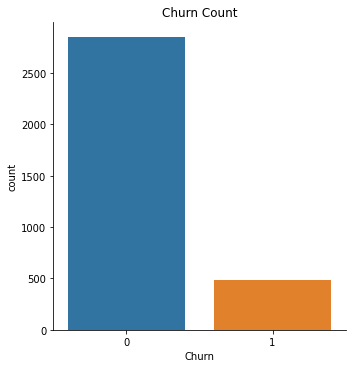

In [16]:
sns.catplot(x = 'Churn', kind = 'count', data = tele_df)
plt.title('Churn Count')

Plotting how many customer's have International Plan using count plot

Text(0.5, 1.0, 'International Plan Count')

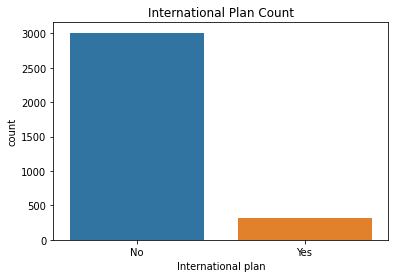

In [17]:
sns.countplot(data = tele_df, x = 'International plan')
plt.title('International Plan Count')

We can observe that there are not many customer's who opted for internationla plan. Now let's plot how many customer's have opted for voice mail plan.

Text(0.5, 1.0, 'Voice Mail Plan Count')

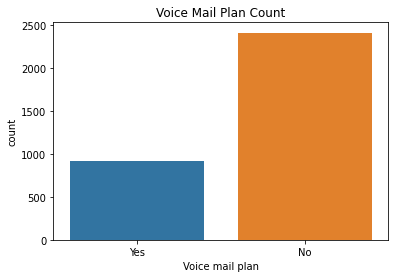

In [18]:
sns.countplot(data = tele_df, x = 'Voice mail plan')
plt.title('Voice Mail Plan Count')

Approximately 30% of our customer's have opted for voice mail plan. Now let us plot number of customer service calls made by customer's

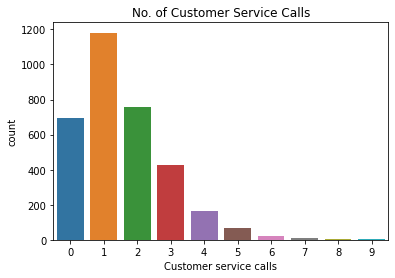

In [19]:
sns.countplot(data= tele_df, x = 'Customer service calls')
plt.title("No. of Customer Service Calls")
plt.show()

We can observce that most number of customer's make between 0 to 3 calls to out customer service.

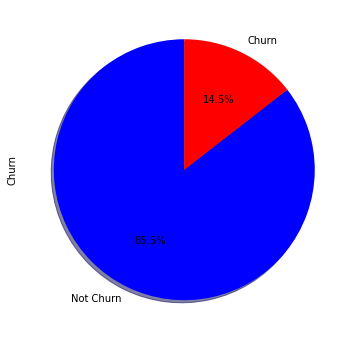

In [20]:
tele_df['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['blue','red'],
                               explode=[0,0]
                              )

We have 14.5% Churn rate.

 Now let us check and plot from which state most of our customer's belongs to.

In [21]:
tele_df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
CO     66
WA     66
NV     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [22]:
tele_df['State'].nunique()

51

In [23]:
print(f"Most of our Customer's belongs to {tele_df['State'].max()} State")
print(f"Least of our Customer's belongs to {tele_df['State'].min()} State")

Most of our Customer's belongs to WY State
Least of our Customer's belongs to AK State


## Relationship Analysis
Let us now begin a fun part. We will check relationship between our  feature and target feature one by one. And will also check how it effects the Churn rate and what kind of relationship is between our feature and target variables. Also we will check what kind of relationship is there between our features.

**Let's make a new columns with name total_minutes(total call minutes for day, evening, night & Intl). And check which state contributes most number of call minutes.**

In [24]:
## Creating column with name Total minutes by adding total day, eve & night minutes
tele_df['Total minutes'] = tele_df['Total day minutes'] + tele_df['Total eve minutes'] + tele_df['Total night minutes'] + tele_df['Total intl minutes']

In [25]:
tele_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,564.8
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,512.0


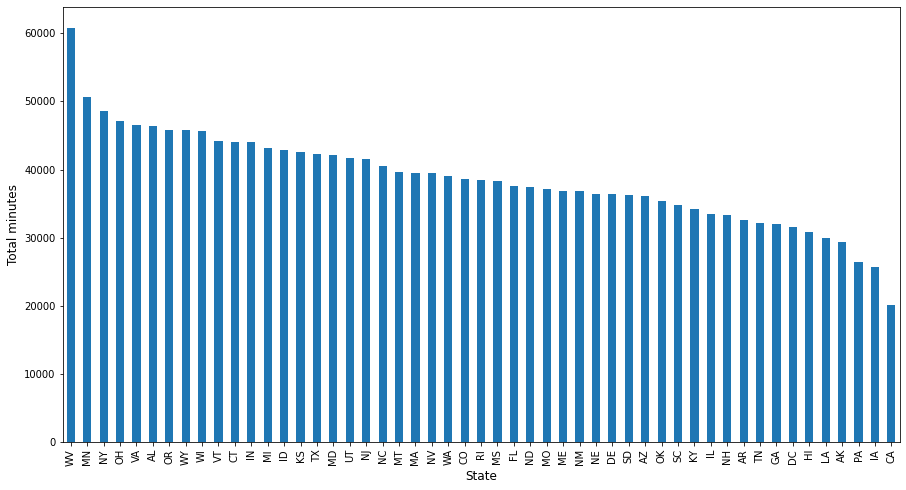

In [26]:
## For checking which state have higher number of minutes we will groupby 'State' column w.r.t 'Total minutes' columns.
plt.figure(figsize=(15,8))
tele_df.groupby('State')['Total minutes'].sum().sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel("State", size=12)
plt.ylabel("Total minutes", size=12)
plt.show()

In [27]:
print(f"State with highest minutes of calls : {tele_df.groupby('State')['Total minutes'].sum().idxmax()}")
print(f"State with lowest minutes of calls : {tele_df.groupby('State')['Total minutes'].sum().idxmin()}")

State with highest minutes of calls : WV
State with lowest minutes of calls : CA


We can observe that state with highest number of customer's don't have highest minutes of calls and same for state with least number of customer's i.e, *AK* have higher minutes than other 3 States i.e, *PA, IA & CA*

**Cool, now let's compare which state have higher churn customers and also which state have higher churn rate(i.e highest % of churn rate)**

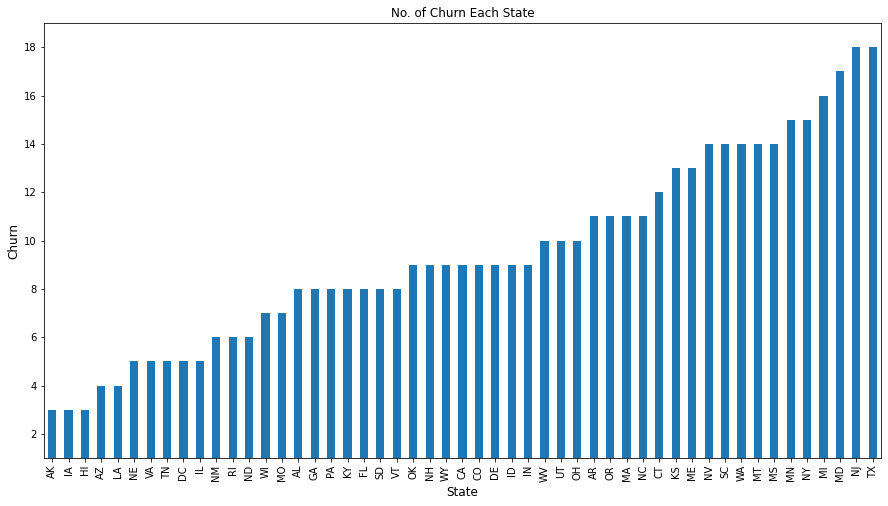

In [28]:
plt.figure(figsize=(15,8))
tele_df.groupby('State')['Churn'].sum().sort_values(ascending=True).plot(kind='bar')
plt.xlabel("State", size=12)
plt.ylabel("Churn", size=12)
plt.title('No. of Churn Each State')
plt.ylim(1,19)
plt.show()

We can observce that TX has the highest number of Churns and AK is on the lowest side.

**Let's check percentage of churn for each State**

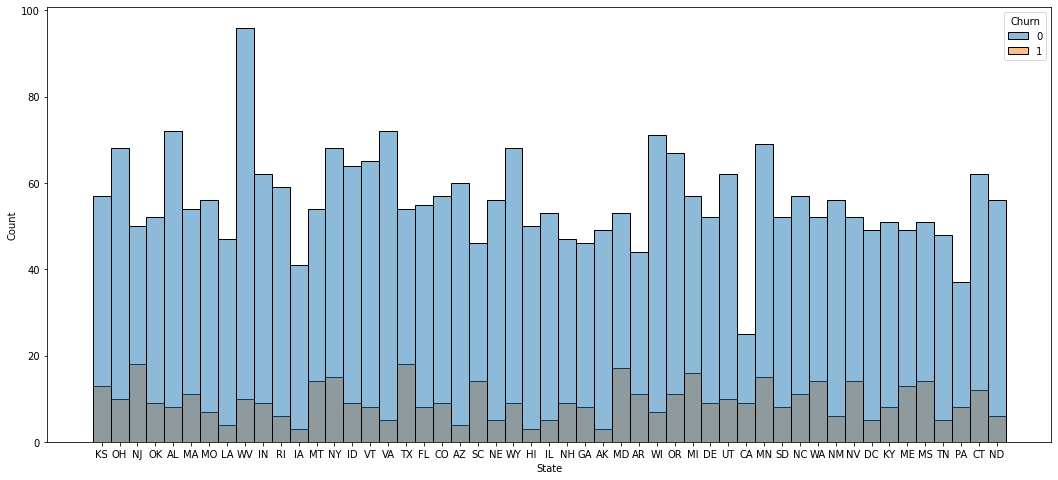

In [29]:
plt.figure(figsize=(18,8))
sns.histplot(x='State', hue='Churn', data=tele_df)

We can observe that even NZ has the highest rate of churn per customer.

In [30]:
## Creating different dataframe for churn and not churn
churned_df = tele_df[tele_df['Churn']==1]
retention_df = tele_df[tele_df['Churn']==0]

In [31]:
## creating a crosstab for state wise w.r.t churn 
state_data = pd.crosstab(tele_df['State'], tele_df['Churn'], normalize='index')

In [32]:
## Calculating churn percentage of each state and adding a new column in a crosstab state_data
state_data['percentage_churn'] = state_data.apply(lambda x : x[1] * 100 / (x[0]  + x[1]), axis = 1)

In [33]:
state_data

Churn,0,1,percentage_churn
State,,,
AK,0.942308,0.057692,5.769231
AL,0.900000,0.100000,10.000000
AR,0.800000,0.200000,20.000000
AZ,0.937500,0.062500,6.250000
CA,0.735294,0.264706,26.470588
CO,0.863636,0.136364,13.636364
CT,0.837838,0.162162,16.216216
DC,0.907407,0.092593,9.259259
DE,0.852459,0.147541,14.754098


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density Distribution of Churn w.r.t No. of States')

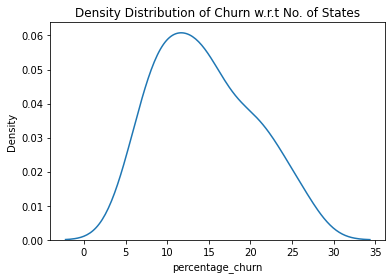

In [34]:
sns.distplot(state_data['percentage_churn'], hist=False)
plt.title('Density Distribution of Churn w.r.t No. of States')

We can observe that Most number of state have churn percentage between 5% to 20%

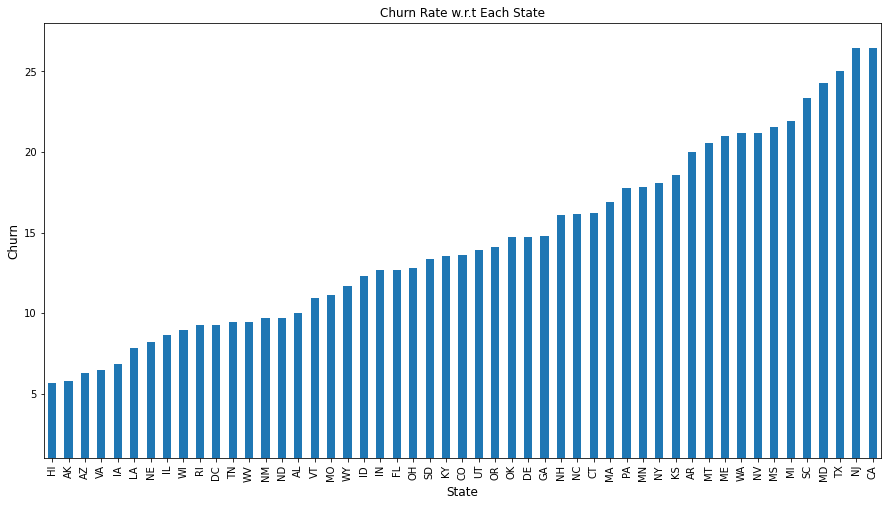

In [35]:
# Plotting churn rate w.r.t ech state
plt.figure(figsize=(15,8))
state_data.groupby('State')['percentage_churn'].sum().sort_values(ascending=True).plot(kind='bar')
plt.xlabel("State", size=12)
plt.ylabel("Churn", size=12)
plt.ylim(1,28)
plt.title('Churn Rate w.r.t Each State')
plt.show()

In [36]:
## Plotting Top 5 states with highest churn rate
state_data.loc[state_data['percentage_churn'] == state_data['percentage_churn']].sort_values(by='percentage_churn',ascending=False)[:5]

Churn,0,1,percentage_churn
State,,,
NJ,0.735294,0.264706,26.470588
CA,0.735294,0.264706,26.470588
TX,0.750000,0.250000,25.000000
MD,0.757143,0.242857,24.285714
SC,0.766667,0.233333,23.333333


In [37]:
## Plotting 5 states with lowest churn rate
state_data.loc[state_data['percentage_churn'] == state_data['percentage_churn']].sort_values(by='percentage_churn')[:5]

Churn,0,1,percentage_churn
State,,,
HI,0.943396,0.056604,5.660377
AK,0.942308,0.057692,5.769231
AZ,0.937500,0.062500,6.250000
VA,0.935065,0.064935,6.493506
IA,0.931818,0.068182,6.818182


We can observe that NJ, CA, TX, MD, SC have the highest churn rate & HI, AK, AZ, VA & IA have the lowest Churn rate

**Now let us check how Voice mail plan is impacting the churn**

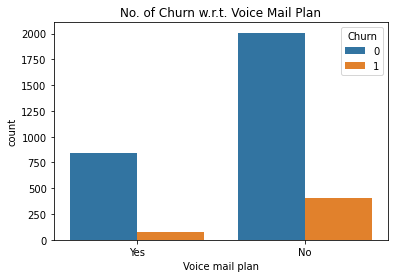

In [38]:
plt.title('No. of Churn w.r.t. Voice Mail Plan')
sns.countplot(x='Voice mail plan', hue='Churn', data=tele_df)

Let's check it numerically to get better insights.

In [39]:
pd.crosstab(tele_df['Voice mail plan'], tele_df['Churn'])

Churn,0,1
Voice mail plan,,
No,2008,403
Yes,842,80


In [40]:
pd.crosstab(tele_df['Voice mail plan'], tele_df['Churn'], normalize='index')

Churn,0,1
Voice mail plan,,
No,0.832849,0.167151
Yes,0.913232,0.086768


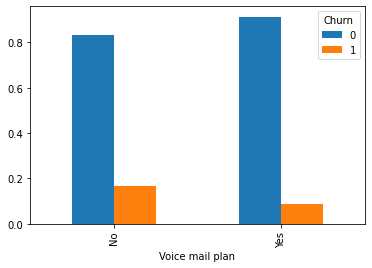

In [41]:
# Ploting percentage of churn rate w.r.t voice mail plan
pd.crosstab(tele_df['Voice mail plan'], tele_df['Churn'], normalize='index').plot(kind='bar')

In [42]:
voice_mail_data = pd.crosstab(tele_df['Voice mail plan'], tele_df['Churn'], normalize='index')

In [43]:
voice_mail_data['percentage_churn'] = voice_mail_data.apply(lambda x : (x[1] * 100) / (x[1] + x[0]), axis=1)

In [44]:
voice_mail_data

Churn,0,1,percentage_churn
Voice mail plan,,,
No,0.832849,0.167151,16.715056
Yes,0.913232,0.086768,8.676790



We can see that around 8% of the customer's churn for those who have opted for Voice mail plan and around 16% of the customer's churn for those who not opted for Voice mail plan.

**As we now know that *Voice mail plan* is impacting the churn rate of our customer's by approximately 8%. Let's check if *International plan* have impact on churn rate or not**

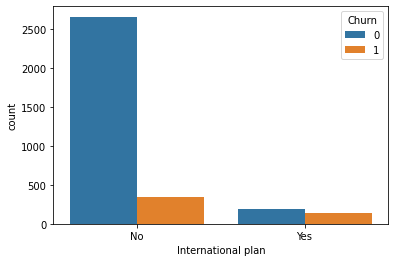

In [45]:
sns.countplot(x='International plan', hue='Churn', data=tele_df)

In [46]:
pd.crosstab(tele_df['International plan'], tele_df['Churn'])

Churn,0,1
International plan,,
No,2664,346
Yes,186,137


In [47]:
pd.crosstab(tele_df['International plan'], tele_df['Churn'], normalize='index')

Churn,0,1
International plan,,
No,0.885050,0.114950
Yes,0.575851,0.424149


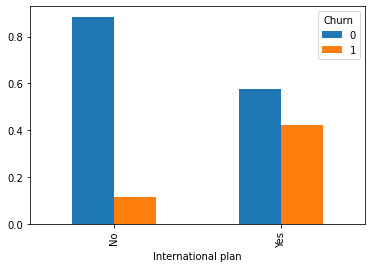

In [48]:
pd.crosstab(tele_df['International plan'], tele_df['Churn'], normalize='index').plot(kind='bar')

In [49]:
international_data = pd.crosstab(tele_df['International plan'], tele_df['Churn'], normalize='index')

In [50]:
international_data['Percentage Churn'] = international_data.apply(lambda x : x[1] * 100 / (x[0] + x[1]),axis=1) 

In [51]:
international_data

Churn,0,1,Percentage Churn
International plan,,,
No,0.885050,0.114950,11.495017
Yes,0.575851,0.424149,42.414861


Now that's a master stroke. We can see that, those customer who have International plan are more likely to go churn than those who don't. As 42% of those who have *International plan* have went churn and around 11% for those who didn't have *International Plan*

**Let's plot international plan data w.r.t international calls, minutes & charge**

In [52]:
## Grouping by international plan w.r.t total intl calls, intl minutes & intl charge and storing it.
international_plan_data = tele_df.groupby('International plan')[['Total intl calls', 'Total intl minutes', 'Total intl charge']].sum().reset_index()

In [53]:
international_plan_data

,International plan,Total intl calls,Total intl minutes,Total intl charge
0,No,13441,30688.0,8287.37
1,Yes,1489,3432.9,926.98


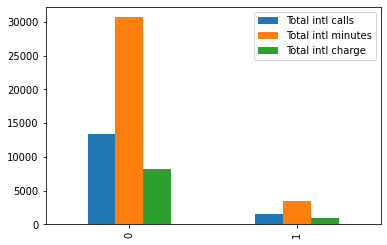

In [54]:
international_plan_data.plot(kind='bar')

We can observe that those who have international plan have less number of international calls then those who don't have international plan. But number of international plan holder's are also less as we have seen above. 

**Before moving further into more complex analysis among features themselves. Let us first check how Customer service calls is impacting a churn rate.**

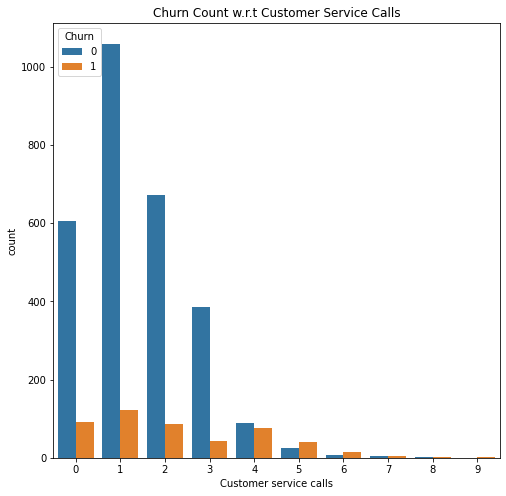

In [55]:
plt.figure(figsize=(8,8))
plt.title("Churn Count w.r.t Customer Service Calls")
sns.countplot(x='Customer service calls', hue='Churn', data=tele_df)

Here we can clearly observe that those customer's who have called customer service for more than 3 time are more like to go churn than those who have called 3 or lesser number of times.

In [56]:
#Creating a crosstab for customer service calls to get more numeric insights.
pd.crosstab(tele_df['Customer service calls'], tele_df['Churn'], normalize='index')

Churn,0,1
Customer service calls,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


In [57]:
#Creating variable for stroing crosstab and then to calculate the percentage of churn for each number of customer service calls.
customer_service_data = pd.crosstab(tele_df['Customer service calls'], tele_df['Churn'], normalize='index')

In [58]:
#Calculate percentage and adding new column into a crosstab
customer_service_data['percentage_churn'] = customer_service_data.apply(lambda x : (x[1] * 100) / (x[1] + x[0]), axis=1)

In [59]:
customer_service_data

Churn,0,1,percentage_churn
Customer service calls,,,
0,0.868006,0.131994,13.199426
1,0.896698,0.103302,10.330229
2,0.885375,0.114625,11.462451
3,0.897436,0.102564,10.256410
4,0.542169,0.457831,45.783133
5,0.393939,0.606061,60.606061
6,0.363636,0.636364,63.636364
7,0.444444,0.555556,55.555556
8,0.500000,0.500000,50.000000


The percentage of Churn have increased drastically from 4 to 9 Customer service calls. Let us check Whether Area Code have impact on Churn or not

**Let's check relationship between customer service calls, state and churn rate. And later we will also visualize relation of customer service calls w.r.t Area Code**

In [60]:
#Calculating customer service calls w.r.t each state and assigning it to the variable
state_customer_service_calls_churn = tele_df.groupby('State')[['Customer service calls', 'Churn']].sum().reset_index().sort_values(by='Customer service calls', ascending=False)

In [61]:
state_customer_service_calls_churn

,State,Customer service calls,Churn
49,WV,159,10
34,NY,142,15
37,OR,135,11
23,MN,130,15
46,VT,127,8
1,AL,125,8
45,VA,123,5
13,ID,122,9
15,IN,120,9
22,MI,119,16


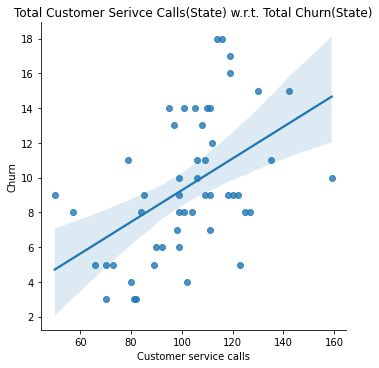

In [62]:
#Plotting customer service calls and churn w.r.t State
sns.lmplot(x='Customer service calls', y = 'Churn', data=state_customer_service_calls_churn)
plt.title("Total Customer Serivce Calls(State) w.r.t. Total Churn(State)")
plt.show()

We can observe that as the number of Customer Service Calls increases of any State then there is the probability of more number of Churn.

In [63]:
tele_df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

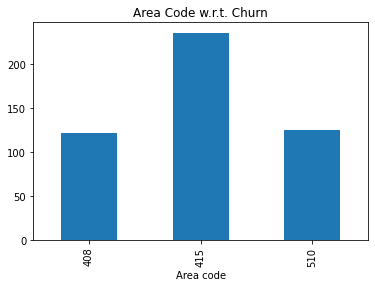

In [64]:
plt.title("Area Code w.r.t. Churn")
tele_df.groupby('Area code')['Churn'].sum().plot(kind='bar')

In [65]:
pd.crosstab(tele_df['Area code'], tele_df['Churn'])

Churn,0,1
Area code,,
408,716,122
415,1419,236
510,715,125


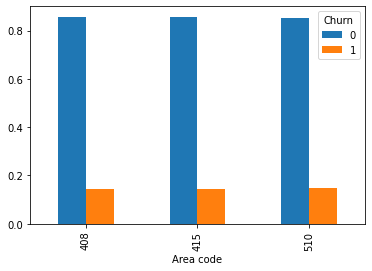

In [66]:
pd.crosstab(tele_df['Area code'], tele_df['Churn'], normalize='index').plot(kind='bar')

Here we can observce that *Area code* alone do not have any impact on customer churn. As, percentage of churn(14%) is same for each and every *Area code*

In [67]:
tele_df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [68]:
tele_df.groupby('Area code').sum()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes
Area code,,,,,,,,,,,,,,,,,
408,85373,6426,148473.0,84216,25240.79,168676.2,83623,14337.60,166941.9,82995,7512.49,8485.9,3709,2291.71,1273,122,492577.0
415,167269,13832,300535.8,166454,51092.06,332079.2,166334,28226.97,334372.2,166159,15046.92,17118.4,7550,4622.84,2572,236,984105.6
510,84207,6736,150181.6,84082,25531.32,169112.1,83724,14374.87,168192.4,84505,7568.66,8516.6,3671,2299.80,1364,125,496002.7


**From above two cells we can observe that area code 415 have double customer's then area code 510 and 408. Thus we should try to increase our customer's from area code 510 & 408.**

**Let us see a relationship between *Account length* and Churn**

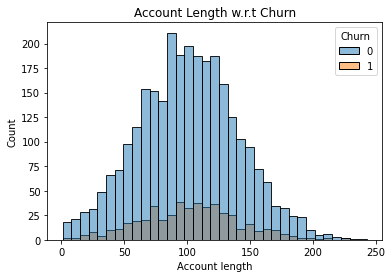

In [69]:
plt.title("Account Length w.r.t Churn")
sns.histplot(x='Account length', hue='Churn', data = tele_df)

We can observe that most number of customer churn are between Account length 50 to 150. But number of account length between those range is also mose as compared to other's.

**Let's check relatinship between total day calls, eve calls & night calls with Churn**


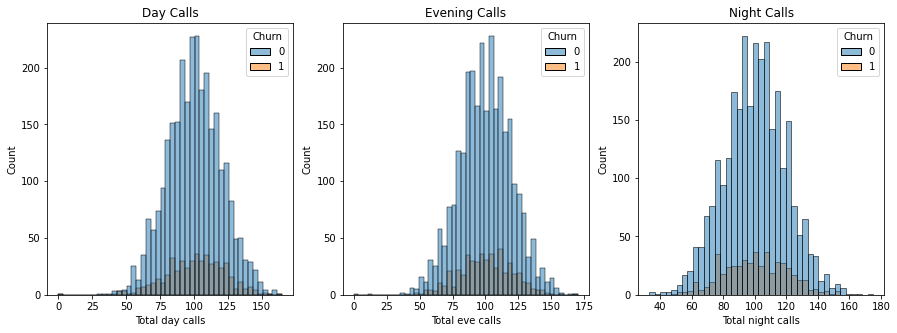

In [70]:
## We will plot 3 subplots for visualizing relation between total day, eve & night calls
plt.figure(figsize=(15,5))

## Total day calls
plt.subplot(1,3,1)
plt.title("Day Calls")
sns.histplot(x='Total day calls', hue='Churn', data=tele_df)

## Total Eve Calls
plt.subplot(1,3,2)
plt.title("Evening Calls")
sns.histplot(x='Total eve calls', hue='Churn', data=tele_df)

## Total night calls
plt.subplot(1,3,3)
plt.title("Night Calls")
sns.histplot(x='Total night calls', hue='Churn', data=tele_df)

Well, that's not much information. We can see that if number of calls are more then there's more number of churn for day, evening and night. Let's try boxplot to get more deeper understanding.

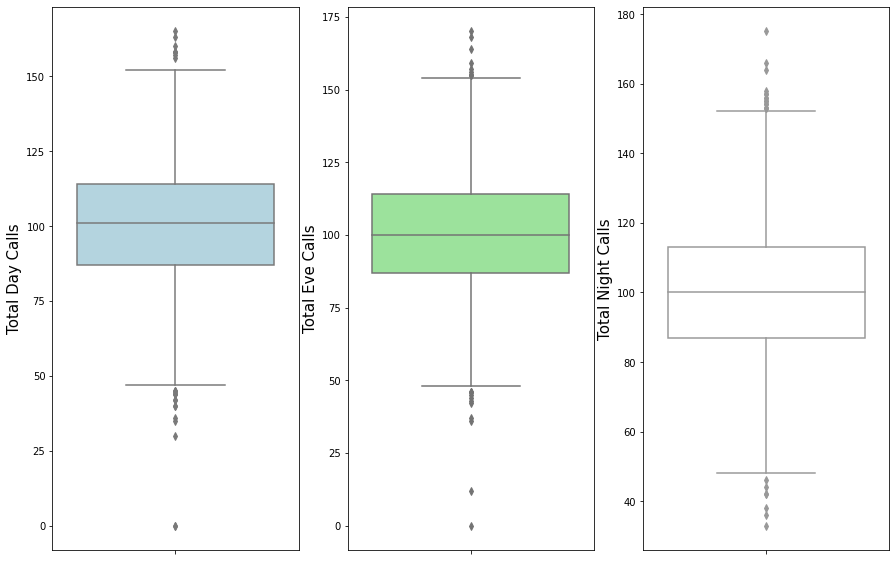

In [71]:
## 3 Sub boxplots for day, eve and night
plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
sns.boxplot(data=tele_df, y = 'Total day calls', color = 'lightblue')
plt.ylabel('Total Day Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = tele_df, y = 'Total eve calls', color = 'lightgreen')
plt.ylabel('Total Eve Calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data= tele_df, y = 'Total night calls', color = 'white')
plt.ylabel('Total Night Calls', fontsize = 15)

plt.show()

From above figure we can observe that most number of calls are made during days, then evening & least number of calls are made during night.

**Let's check relatinship between total day minutes, eve minutes & night minutes with Churn**

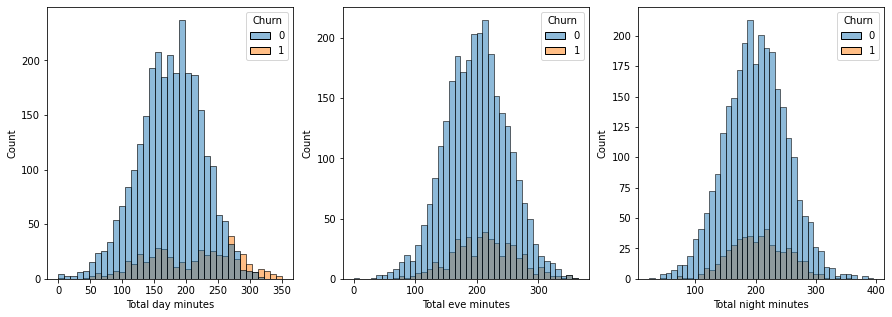

In [72]:
plt.figure(figsize=(15,5))
plt.title('Total minutes w.r.t. Churn')

plt.subplot(1,3,1)
sns.histplot(x='Total day minutes', hue='Churn', data=tele_df)

plt.subplot(1,3,2)
sns.histplot(x='Total eve minutes', hue='Churn', data=tele_df)

plt.subplot(1,3,3)
sns.histplot(x='Total night minutes', hue='Churn', data=tele_df)

Here we can observce that, those customer's who spends more minutes during the day on call are more likely to go churn then those who speaks more during evening or night.

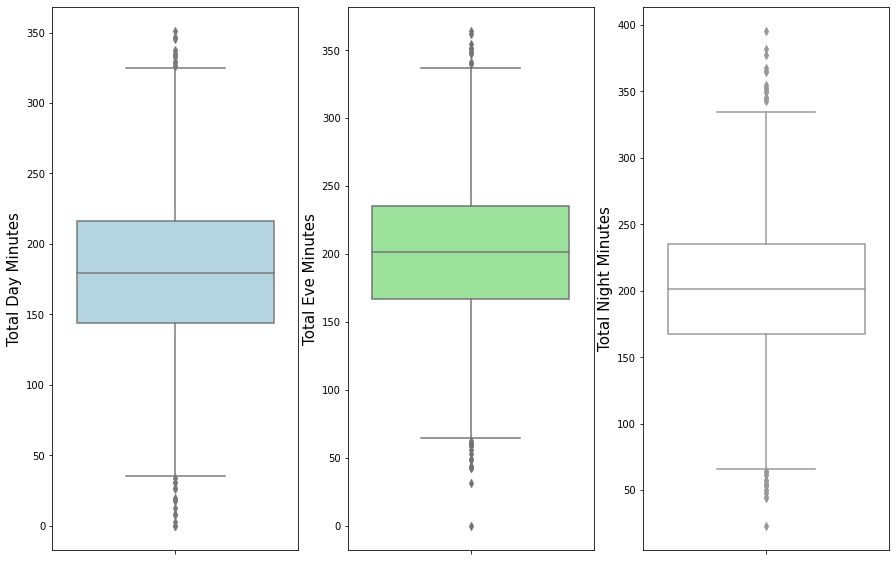

In [73]:
## 3 Sub boxplots for day, eve and night
plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
sns.boxplot(data=tele_df, y = 'Total day minutes', color = 'lightblue')
plt.ylabel('Total Day Minutes', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = tele_df, y = 'Total eve minutes', color = 'lightgreen')
plt.ylabel('Total Eve Minutes', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data= tele_df, y = 'Total night minutes', color = 'white')
plt.ylabel('Total Night Minutes', fontsize = 15)

plt.show()

We can observe that our cutomer's tends to call for longer minutes more likely during evening then day and night.

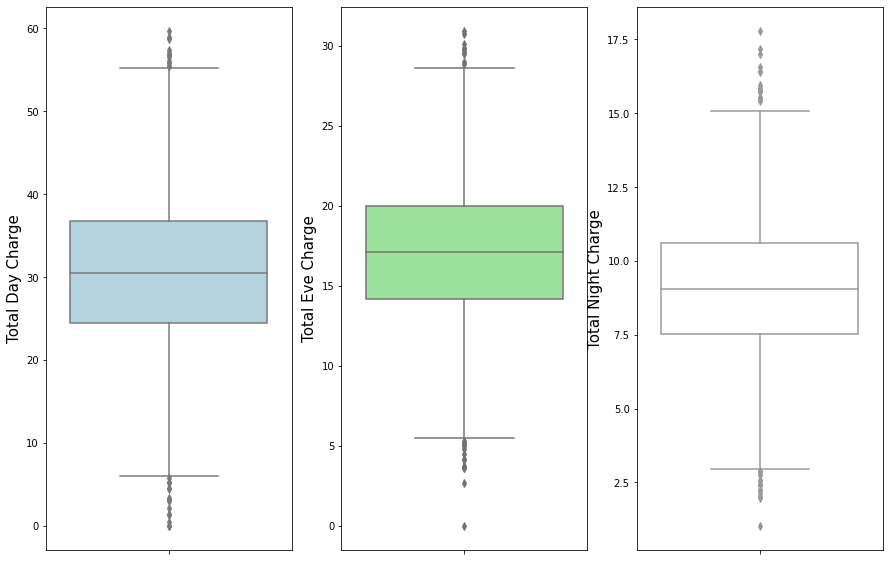

In [74]:
## 3 Sub boxplots for day, eve and night
plt.figure(figsize = (15,10))

plt.subplot(1,3,1)
sns.boxplot(data=tele_df, y = 'Total day charge', color = 'lightblue')
plt.ylabel('Total Day Charge', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = tele_df, y = 'Total eve charge', color = 'lightgreen')
plt.ylabel('Total Eve Charge', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data= tele_df, y = 'Total night charge', color = 'white')
plt.ylabel('Total Night Charge', fontsize = 15)

plt.show()

Most charge is incurred for evening calls by our customers.

**Now let us check relatinship between total day calls, night calls, evening calls, total day minutes, night minutes, evening minutes & total day charge, eve charge & night charge w.r.t Churn**

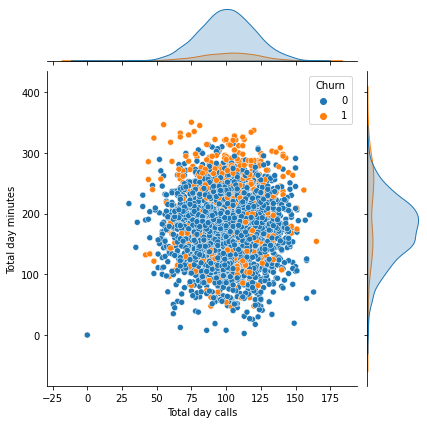

In [75]:
sns.jointplot(x='Total day calls', y='Total day minutes', hue='Churn',data=tele_df)

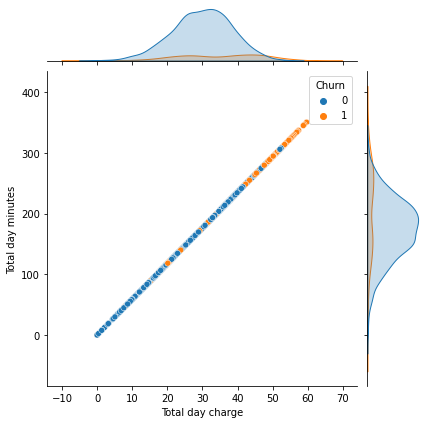

In [76]:
sns.jointplot(x='Total day charge', y='Total day minutes', hue='Churn',data=tele_df)

We can see that there's a linear relationship between Total day charge & Total day minutes. Also we can observe that those who have higher total day charge and total day minutes are more likely to go churn.

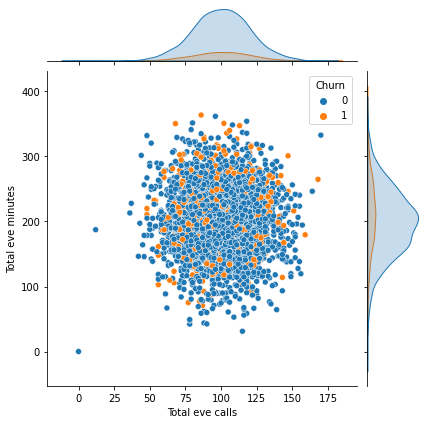

In [77]:
sns.jointplot(x='Total eve calls', y='Total eve minutes', hue='Churn',data=tele_df)

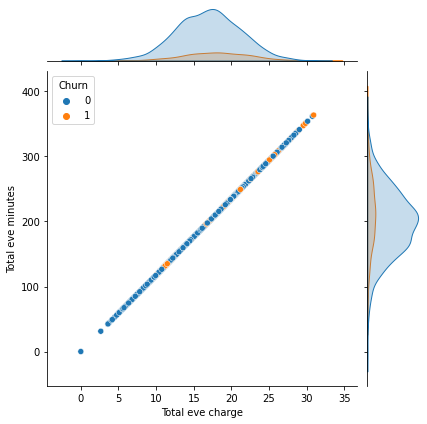

In [78]:
sns.jointplot(x='Total eve charge', y='Total eve minutes', hue='Churn',data=tele_df)

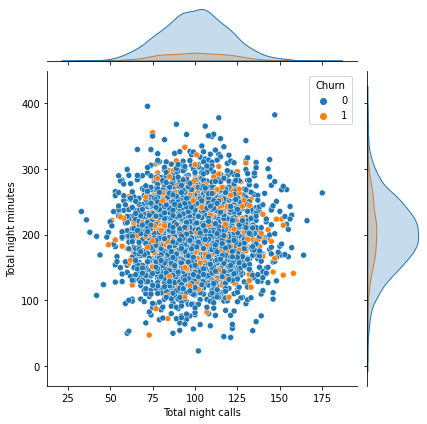

In [79]:
sns.jointplot(x='Total night calls', y='Total night minutes', hue='Churn', data=tele_df)

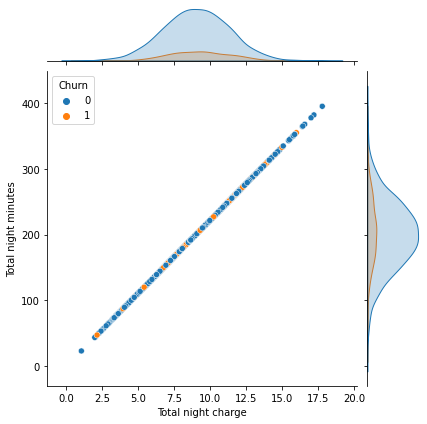

In [80]:
sns.jointplot(x='Total night charge', y='Total night minutes', hue='Churn',data=tele_df)

From the above 6 plots we can observe that our customer's tends to call more during the day time but speak less during the day time and prefer to speak more time during night calls. 
*Nigth calls minutes* > *Evening calls minutes* > *Day calls minutes*.
Also there's linear relationship between Total Charge and Total Calls. And those customer's who tend's to speak more time during the day are more likely to go churn and have higher Total charge.

**Let's check a relationship between *International calls* and *International Plan*.**

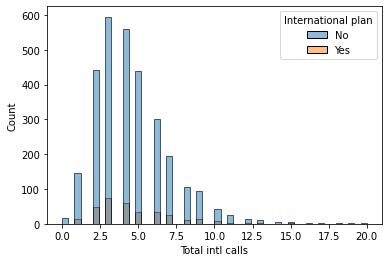

In [81]:
sns.histplot(x='Total intl calls', hue='International plan', data=tele_df)

In [82]:
pd.crosstab(tele_df['Total intl calls'], tele_df['International plan'], normalize='index')

International plan,No,Yes
Total intl calls,,
0,1.000000,0.000000
1,0.918750,0.081250
2,0.903885,0.096115
3,0.890719,0.109281
4,0.903069,0.096931
5,0.930085,0.069915
6,0.898810,0.101190
7,0.889908,0.110092
8,0.913793,0.086207


Well from the above figure and crosstab between International calls and International Plan we can see that those customer's who don't have international plan have more calls overseas as compared to those who have international plan.

**Let us see relationship between *Total intl calls, intl charge, intl minutes* and *Churn***

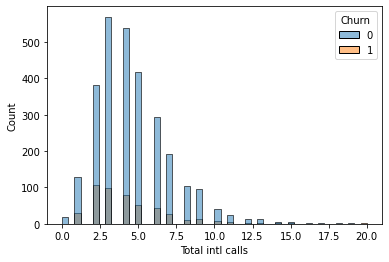

In [83]:
sns.histplot(x='Total intl calls', hue='Churn', data=tele_df)

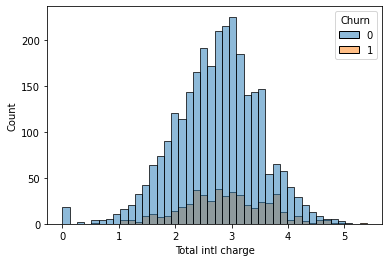

In [84]:
sns.histplot(x='Total intl charge', hue='Churn', data=tele_df)

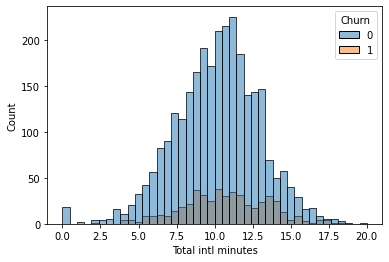

In [85]:
sns.histplot(x='Total intl minutes', hue='Churn', data=tele_df)

So from the above 3 plots we can observe that - 
1. Those who have international calls between 2 - 5 hive higher chances of churn then compared to other's.
2. Those who bear a cost of international calls of more than 2 time are more likely to go churn.
3. Those who have intl minutes of more than 8 have higher chances of going churn.

**Relationshio between International calls, minutes & charge between themselves w.r.t Churn**

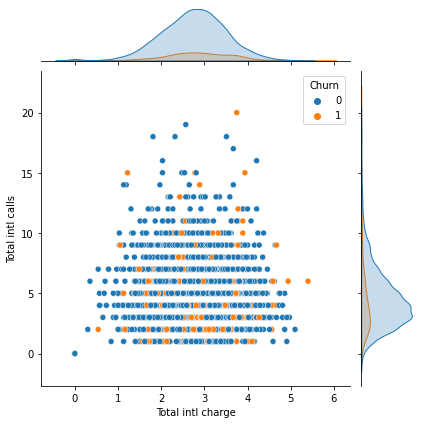

In [86]:
sns.jointplot(x='Total intl charge', y='Total intl calls', hue='Churn', data=tele_df)

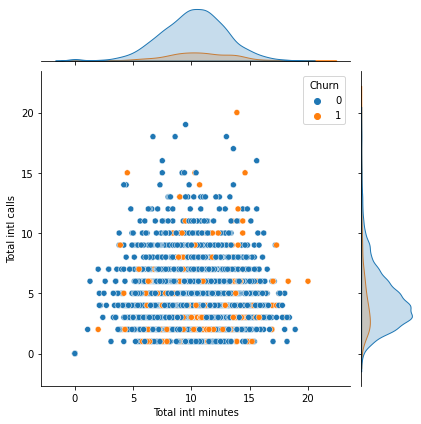

In [87]:
sns.jointplot(x='Total intl minutes', y='Total intl calls', hue='Churn', data=tele_df)

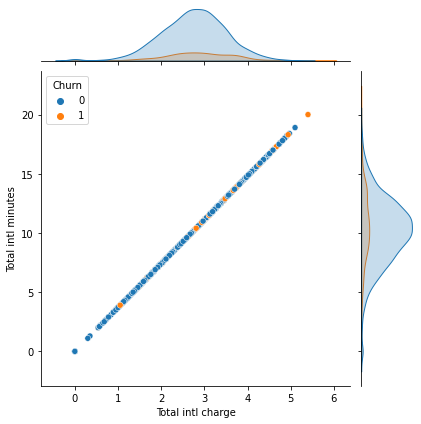

In [88]:
sns.jointplot(x='Total intl charge', y='Total intl minutes', hue='Churn', data=tele_df)

We can see the linear relationship between Total intl charge and total intl minutes.

**Checking the correlation between each variable by using heatmap**

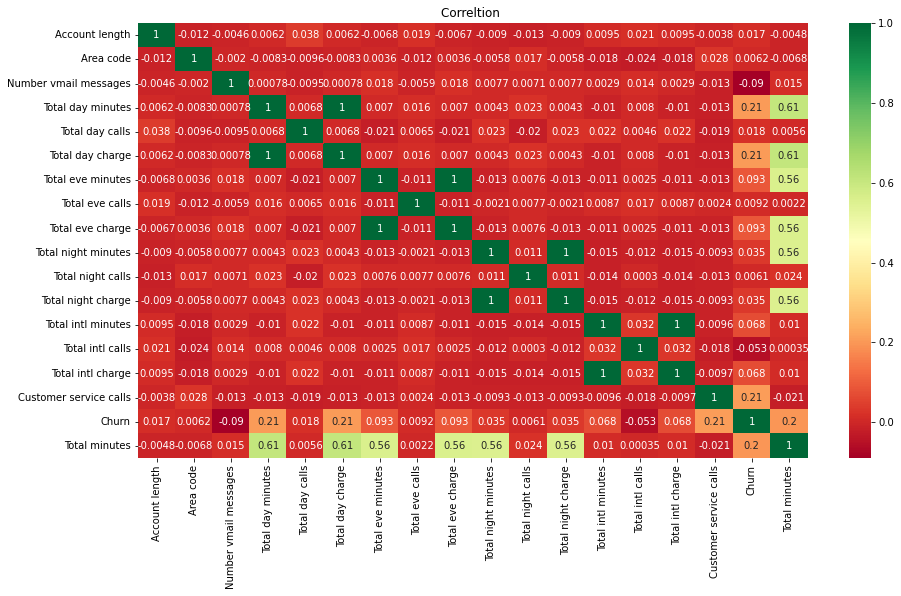

In [89]:
plt.figure(figsize = (15,8))
sns.heatmap(data = tele_df.corr(), annot = True, cmap="RdYlGn")
plt.title("Correltion ")
plt.show()

**From the above heatmap we can observe that-**
1. Correlation w.r.t Churn - 
    * Total day minutes to Churn at 0.21
    * Total day charge to Churn at 0.21
    * Customer service calls to Churn is 0.21
    * Total minuites to churn is 0.2

2. Correlation w.r.t each other - 
    * Total day charge to Total day minutes at 1
    * Total evening charge to total eve minutes at 1
    * Total night charge to total night minutes at 1
    * Total day minutes & day charge to total minutes is 0.61
    * Total eve minutes, charge & night minutes,charge to total minutes is 0.56

**As now we're pretty much familiar with our data. Let's get some more insight using data wrangling methods..**

**Let's check a top 5 State with highest number of day calls**

In [90]:
## Making a separate dataframe by using groupby function for Total day calls w.r.t State
tele_df_high_call_state = tele_df.groupby('State')['Total day calls'].sum().reset_index()

In [91]:
tele_df_top5_high_call_state = tele_df_high_call_state.loc[tele_df_high_call_state['Total day calls'] == tele_df_high_call_state['Total day calls']].sort_values(by='Total day calls', ascending=False)[:5]

In [92]:
tele_df_top5_high_call_state

,State,Total day calls
49,WV,11001
23,MN,8326
34,NY,8154
45,VA,8113
1,AL,7928


Now we know the State with top 5 Total day calls. Let's check same total evening calls and total night calls.

In [93]:
## Making a dataframe for total evening calls by Total eve calls w.r.t State
tele_df_eve_calls_state = tele_df.groupby('State')['Total eve calls'].sum().reset_index()

In [94]:
## Let's sort a value for total eve calls in descending order and let's keep it in a separate dataframe
tele_df_top5_eve_calls_state = tele_df_eve_calls_state.loc[tele_df_eve_calls_state['Total eve calls'] == tele_df_eve_calls_state['Total eve calls']].sort_values(by='Total eve calls', ascending = False)[0:5]

In [95]:
tele_df_top5_eve_calls_state

,State,Total eve calls
49,WV,10394
23,MN,8538
34,NY,8302
35,OH,7894
1,AL,7877


In [96]:
## Making a dataframe for total nigth calls by Total eve calls w.r.t State
tele_df_night_calls_state = tele_df.groupby('State')['Total night calls'].sum().reset_index()

In [97]:
tele_df_top5_night_calls_state = tele_df_night_calls_state.loc[tele_df_night_calls_state['Total night calls'] == tele_df_night_calls_state['Total night calls']].sort_values(by='Total night calls', ascending = False)[0:5]

In [98]:
tele_df_top5_night_calls_state

,State,Total night calls
49,WV,10660
23,MN,8579
34,NY,8251
35,OH,8054
37,OR,8009


**Now let's check for overall number of calls w.r.t each state**

In [99]:
tele_df_overall_calls_state = tele_df.groupby('State')[['Total day calls'] + ['Total eve calls'] + ['Total night calls']].sum().reset_index()

In [100]:
tele_df_overall_calls_state['Total overall calls'] = tele_df_overall_calls_state['Total day calls'] + tele_df_overall_calls_state['Total eve calls'] + tele_df_overall_calls_state['Total night calls']

In [101]:
tele_df_overall_calls_state

,State,Total day calls,Total eve calls,Total night calls,Total overall calls
0,AK,4954,5022,5062,15038
1,AL,7928,7877,7889,23694
2,AR,5618,5381,5448,16447
3,AZ,6407,6554,6399,19360
4,CA,3553,3505,3373,10431
5,CO,6278,6479,6406,19163
6,CT,7284,7335,7569,22188
7,DC,5409,5507,5274,16190
8,DE,6017,5939,6174,18130
9,FL,6363,6862,6321,19546


In [102]:
tele_df_top5_overall_calls_state = tele_df_overall_calls_state.loc[tele_df_overall_calls_state['Total overall calls'] == tele_df_overall_calls_state['Total overall calls']].sort_values(by='Total overall calls', ascending=False)[:5] 

In [103]:
tele_df_top5_overall_calls_state

,State,Total day calls,Total eve calls,Total night calls,Total overall calls
49,WV,11001,10394,10660,32055
23,MN,8326,8538,8579,25443
34,NY,8154,8302,8251,24707
35,OH,7771,7894,8054,23719
1,AL,7928,7877,7889,23694


**Let's do it for international calls too**

In [104]:
tele_df_intl_calls_state = tele_df.groupby('State')['Total intl calls'].sum().reset_index()

In [105]:
tele_df_top5_intl_calls_state = tele_df_intl_calls_state.loc[tele_df_intl_calls_state['Total intl calls'] == tele_df_intl_calls_state['Total intl calls']].sort_values(by='Total intl calls', ascending=False)[:5]

In [106]:
tele_df_top5_intl_calls_state

,State,Total intl calls
49,WV,468
34,NY,385
50,WY,383
1,AL,376
45,VA,365


In [107]:
## Creating a function to extract State name from a given Series
def get_state_name(state):
    state_list = []
    for elem in state:
        state_list.append(elem)
    return state_list

In [108]:
print(f"5 State with highest overall calls are {get_state_name(tele_df_top5_overall_calls_state['State'])}")
print(f"5 State with highest day calls are {get_state_name(tele_df_top5_high_call_state['State'])}")
print(f"5 State with highest eve calls are {get_state_name(tele_df_top5_eve_calls_state['State'])}")
print(f"5 State with highest night calls are {get_state_name(tele_df_top5_night_calls_state['State'])}")
print(f"5 State with highest International calls are {get_state_name(tele_df_top5_intl_calls_state['State'])}")

5 State with highest overall calls are ['WV', 'MN', 'NY', 'OH', 'AL']
5 State with highest day calls are ['WV', 'MN', 'NY', 'VA', 'AL']
5 State with highest eve calls are ['WV', 'MN', 'NY', 'OH', 'AL']
5 State with highest night calls are ['WV', 'MN', 'NY', 'OH', 'OR']
5 State with highest International calls are ['WV', 'NY', 'WY', 'AL', 'VA']


**We can do the same and get top 5 and least 5 State with charges & minutes**

**Top 5 States with highest overall charges**

In [109]:
df = tele_df.groupby('State')[['Total day charge', 'Total night charge', 'Total eve charge']].sum().reset_index()

In [110]:
df['Total Charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

In [111]:
tele_df_top5_charge_state = df.loc[df['Total Charge'] == df['Total Charge']].sort_values(by='Total Charge', ascending=False)[:5]

In [112]:
tele_df_top5_charge_state

,State,Total day charge,Total night charge,Total eve charge,Total Charge
49,WV,3134.67,959.06,1697.56,5791.29
23,MN,2618.36,792.59,1423.27,4834.22
34,NY,2470.94,759.26,1389.79,4619.99
1,AL,2529.72,674.23,1329.16,4533.11
35,OH,2430.29,717.75,1368.73,4516.77


**Top 5 states with highest overall minutes**

In [113]:
df = tele_df.groupby('State')[['Total day minutes', 'Total night minutes', 'Total eve minutes']].sum().reset_index()

In [114]:
df['Total Minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']

In [115]:
tele_df_top5_minutes_state = df.loc[df['Total Minutes'] == df['Total Minutes']].sort_values(by='Total Minutes', ascending = False)[:5]

In [116]:
tele_df_top5_minutes_state

,State,Total day minutes,Total night minutes,Total eve minutes,Total Minutes
49,WV,18438.8,21311.9,19971.8,59722.5
23,MN,15401.8,17613.2,16744.1,49759.1
34,NY,14534.5,16871.3,16350.5,47756.3
35,OH,14295.4,15950.3,16102.4,46348.1
45,VA,13647.8,16398.2,15724.7,45770.7


In [117]:
print(f"5 State with highest overall charges are {get_state_name(tele_df_top5_charge_state['State'])}")
print(f"5 State with highest overall minutes are {get_state_name(tele_df_top5_minutes_state['State'])}")

5 State with highest overall charges are ['WV', 'MN', 'NY', 'AL', 'OH']
5 State with highest overall minutes are ['WV', 'MN', 'NY', 'OH', 'VA']


**So that's what we have got from our data analysis. Now let's get to the point why we carried out this intensive EDA. Let's give some of the factors responsible for customer churn & and recommendations to increase the retention of a customer**

# Inference- 

## Insights we got from EDA - 

1. Most of our customer's does not opt for ***International plan*** and those who opt are more likely to go churn.

2. Around **16%** of our customer's are more likely to be go churn who have not opted for ***Voice mail plan*** & **8%** will go churn for those who have opted for a plan.

3. Customer's who call ***Customer service*** for **4** or more times are more likely to go churn then those who call **3** times or less then that.

4. TX State have a highest number of customer churn where as AK is the State with lowest number of customer churn.

5. ***Area code*** does not have any direct relatinship with customer churn, as churn rate is same for each and evry ***Area code***

6. Customer's who spends more time dusring the day on calls are more likely to go Churn.

7. Most of our customer's prefer to calls more during the day time but speak for less time. Those who call during night time are the one who spends more time on calls.

8. Those customer's who don't have international plan have more calls overseas as compared to those who have international plan.

9. NZ State has a highest percentage of Churn rate.

10. Those who have international calls between 2 - 5 hive higher chances of churn then compared to other's.

11. Those who bear a cost of international calls of more than 2 time are more likely to go churn.

12. Those who have intl minutes of more than 8 have higher chances of going churn.

13. There's linear relatinship between total international charge and total international minutes.

14. Even if it's day, evening or night calls we can see there's linear relationship between Charges & minutes.

15. Total day calls contributes more to Charges and minutes.Total day calls & minutes to churn have correlation of 0.21.

16. We can observe that NJ, CA, TX, MD, SC have the highest churn rate & HI, AK, AZ, VA & IA have the lowest Churn rate

17. WV, MN & NY are states with most number of calls, charge & minutes. With OL, OH, OR & AL being frequenyt in the list.

18. WV, NY & WY are states with most number of international calls followed by AL & VA.

## Key factor's responsible for customer churn - 

1. Customer's who have international plan will most probably go churn which may be cause of higher cost for international plan.

2. Customer's who calls during day and have higher calling minutes will go churn.

3. Customer's who calls customer service more frequently are likely fo go churn. So it's our responsibility to troubleshoot the problem face by them as soon as possible.

4. Customer's who don't have voice mail plan are more likely to go churn.

5. Customer's if they incurr international charge of more than 8 are more likely to go churn.

## Recommendations for retention of our customer's - 

1. We must try to introduce a new scheme for international plan. By which our customer's will be benefited more than what they are geting now. Also we can decrease the cost of our international plan as we can see those customer's who incurr international charge of more than 8 are more likely to go churn.

2. We can introduce a service for those who calls more number of time. Like unlimited calling for certain amount of days.

3. Also we can cut down the cost for those customer's who tends to have longer talk-time.

4. Imporvement in customer services can be done so that churn w.r.t more number of calls doesn't get increased.

5. We can introduce a State based plan for states where we have higher rate of customer churn.